##### INFO6250 SEC 34274

# United States House Rent Prediction

Ashish Roy – NUID: 001044804

## Introduction

#### United States House Rent Prediction aims to predict the house rent the main aim of the project is to build a Machine Learning model to predict the rental prices of a house throughout the United States based on different variables describing the features of the houses. This dataset has multiple features that describes the complete nature of the house and its dynamics, and a target feature ‘Price’ that is to be predicted

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
%matplotlib inline

### Importing Data

In [2]:
raw_data = pd.read_csv('housing_train.csv')

### Data Description

In [3]:
raw_data.head()

id                                                url      region  \
0  7039061606  https://bham.craigslist.org/apa/d/birmingham-h...  birmingham   
1  7041970863  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   
2  7041966914  https://bham.craigslist.org/apa/d/birmingham-g...  birmingham   
3  7041966936  https://bham.craigslist.org/apa/d/birmingham-f...  birmingham   
4  7041966888  https://bham.craigslist.org/apa/d/birmingham-2...  birmingham   

                    region_url  price       type  sqfeet  beds  baths  \
0  https://bham.craigslist.org   1195  apartment    1908     3    2.0   
1  https://bham.craigslist.org   1120  apartment    1319     3    2.0   
2  https://bham.craigslist.org    825  apartment    1133     1    1.5   
3  https://bham.craigslist.org    800  apartment     927     1    1.0   
4  https://bham.craigslist.org    785  apartment    1047     2    1.0   

   cats_allowed  ...  wheelchair_access  electric_vehicle_charge  \
0             1  ...                  0                        0   
1             1  ...                  0                        0   
2             1  ...                  0                        0   
3             1  ...                  0                        0   
4             1  ...                  0                        0   

   comes_furnished  laundry_options     parking_options  \
0                0  laundry on site      street parking   
1                0  laundry on site  off-street parking   
2                0  laundry on site      street parking   
3                0  laundry on site      street parking   
4                0  laundry on site      street parking   

                                           image_url  \
0  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1  https://images.craigslist.org/00707_uRrY9CsNMC...   
2  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4  https://images.craigslist.org/00y0y_21c0FOvUXm...   

                                         description      lat     long  state  
0  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al  
1  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045     al  
2  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al  
3  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al  
4  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065     al  

[5 rows x 22 columns]

In [4]:
raw_data.tail()

id                                                url  \
265185  7050851033  https://columbus.craigslist.org/apa/d/columbus...   
265186  7050887997  https://columbus.craigslist.org/apa/d/grove-ci...   
265187  7044801015  https://columbus.craigslist.org/apa/d/columbus...   
265188  7050885800  https://columbus.craigslist.org/apa/d/newark-l...   
265189  7050884586  https://columbus.craigslist.org/apa/d/columbus...   

          region                       region_url  price       type  sqfeet  \
265185  columbus  https://columbus.craigslist.org      0  apartment    1061   
265186  columbus  https://columbus.craigslist.org   1069  apartment    1020   
265187  columbus  https://columbus.craigslist.org   1507  apartment    1660   
265188  columbus  https://columbus.craigslist.org   1001  apartment    1220   
265189  columbus  https://columbus.craigslist.org   1164  townhouse    1300   

        beds  baths  cats_allowed  ...  wheelchair_access  \
265185     2    2.0             1  ...                  0   
265186     2    1.5             1  ...                  0   
265187     2    1.5             1  ...                  0   
265188     3    1.5             1  ...                  0   
265189     2    2.5             1  ...                  0   

        electric_vehicle_charge  comes_furnished  laundry_options  \
265185                        0                0      w/d in unit   
265186                        0                0      w/d hookups   
265187                        0                0              NaN   
265188                        0                0      w/d hookups   
265189                        0                0      w/d hookups   

           parking_options                                          image_url  \
265185     detached garage  https://images.craigslist.org/00m0m_8wP9hX96TZ...   
265186     detached garage  https://images.craigslist.org/00N0N_ioCvFNCv24...   
265187                 NaN  https://images.craigslist.org/00j0j_5EIRWzdHCV...   
265188  off-street parking  https://images.craigslist.org/00J0J_6VSTqFJb86...   
265189     attached garage  https://images.craigslist.org/00w0w_h1L3gxb8rG...   

                                              description      lat     long  \
265185  â BERKLEY HOUSE â   Voted #1 BEST Communit...  40.0495 -83.0669   
265186  !!!!Tour today and receive $5 Starbucks gift c...  39.8408 -83.0804   
265187  The Commons at Olentangy4765 Blairfield Dr, Co...  40.0564 -83.0417   
265188  www.McMillenWoods.com  www.mcmillenwoods.com  ...  40.0451 -82.4564   
265189  Park Club apartments is offering some of the B...      NaN      NaN   

        state  
265185     oh  
265186     oh  
265187     oh  
265188     oh  
265189    NaN  

[5 rows x 22 columns]

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

##### There are 13 numerical features and 9 categorical features. Also from the above step, we can see that there are missing values in columns 15 to 21 which we will resolve later.

In [6]:
raw_data.describe().T

count          mean           std           min  \
id                       265190.0  7.040888e+09  8.778930e+06  7.003808e+09   
price                    265190.0  1.227285e+04  5.376352e+06  0.000000e+00   
sqfeet                   265190.0  1.093678e+03  2.306888e+04  0.000000e+00   
beds                     265190.0  1.912414e+00  3.691900e+00  0.000000e+00   
baths                    265190.0  1.483468e+00  6.302080e-01  0.000000e+00   
cats_allowed             265190.0  7.168219e-01  4.505430e-01  0.000000e+00   
dogs_allowed             265190.0  6.965496e-01  4.597489e-01  0.000000e+00   
smoking_allowed          265190.0  7.338965e-01  4.419199e-01  0.000000e+00   
wheelchair_access        265190.0  7.875863e-02  2.693622e-01  0.000000e+00   
electric_vehicle_charge  265190.0  1.435952e-02  1.189680e-01  0.000000e+00   
comes_furnished          265190.0  4.864437e-02  2.151238e-01  0.000000e+00   
lat                      263771.0  3.720886e+01  5.659648e+00 -4.353330e+01   
long                     263771.0 -9.239815e+01  1.737078e+01 -1.638940e+02   

                                  25%           50%           75%  \
id                       7.035963e+09  7.043109e+09  7.048362e+09   
price                    8.170000e+02  1.060000e+03  1.450000e+03   
sqfeet                   7.520000e+02  9.500000e+02  1.156000e+03   
beds                     1.000000e+00  2.000000e+00  2.000000e+00   
baths                    1.000000e+00  1.000000e+00  2.000000e+00   
cats_allowed             0.000000e+00  1.000000e+00  1.000000e+00   
dogs_allowed             0.000000e+00  1.000000e+00  1.000000e+00   
smoking_allowed          0.000000e+00  1.000000e+00  1.000000e+00   
wheelchair_access        0.000000e+00  0.000000e+00  0.000000e+00   
electric_vehicle_charge  0.000000e+00  0.000000e+00  0.000000e+00   
comes_furnished          0.000000e+00  0.000000e+00  0.000000e+00   
lat                      3.350850e+01  3.798490e+01  4.116840e+01   
long                    -1.047040e+02 -8.647830e+01 -8.128460e+01   

                                  max  
id                       7.051263e+09  
price                    2.768307e+09  
sqfeet                   8.388607e+06  
beds                     1.100000e+03  
baths                    7.500000e+01  
cats_allowed             1.000000e+00  
dogs_allowed             1.000000e+00  
smoking_allowed          1.000000e+00  
wheelchair_access        1.000000e+00  
electric_vehicle_charge  1.000000e+00  
comes_furnished          1.000000e+00  
lat                      1.020360e+02  
long                     1.726330e+02

In [7]:
raw_data.columns.shape

(22,)

#### There are 265,189 rows and 22 columns in our data, our of which 13 columns have numerical data and remaning 9 columns have textual data.

### Dropping unwanted columns

##### Since we know that columns of id, url, region_url, image_url and description are not required for our current problem, we drop them from our dataset.

In [8]:
data = raw_data.drop(columns = ['id', 'url', 'region_url', 'image_url', 'description'])

In [9]:
data.head()

region  price       type  sqfeet  beds  baths  cats_allowed  \
0  birmingham   1195  apartment    1908     3    2.0             1   
1  birmingham   1120  apartment    1319     3    2.0             1   
2  birmingham    825  apartment    1133     1    1.5             1   
3  birmingham    800  apartment     927     1    1.0             1   
4  birmingham    785  apartment    1047     2    1.0             1   

   dogs_allowed  smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0             1                1                  0                        0   
1             1                1                  0                        0   
2             1                1                  0                        0   
3             1                1                  0                        0   
4             1                1                  0                        0   

   comes_furnished  laundry_options     parking_options      lat     long  \
0                0  laundry on site      street parking  33.4226 -86.7065   
1                0  laundry on site  off-street parking  33.3755 -86.8045   
2                0  laundry on site      street parking  33.4226 -86.7065   
3                0  laundry on site      street parking  33.4226 -86.7065   
4                0  laundry on site      street parking  33.4226 -86.7065   

  state  
0    al  
1    al  
2    al  
3    al  
4    al

### Missing values and Outliers

In [10]:
data.isnull().sum().sort_values(ascending = False)

parking_options            95135
laundry_options            54311
lat                         1419
long                        1419
state                          1
baths                          0
price                          0
type                           0
sqfeet                         0
beds                           0
smoking_allowed                0
cats_allowed                   0
dogs_allowed                   0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
region                         0
dtype: int64

In [11]:
data_missing = data.copy()

In [12]:
data_missing.loc[265189]

region                            columbus
price                                 1164
type                             townhouse
sqfeet                                1300
beds                                     2
baths                                  2.5
cats_allowed                             1
dogs_allowed                             1
smoking_allowed                          0
wheelchair_access                        0
electric_vehicle_charge                  0
comes_furnished                          0
laundry_options                w/d hookups
parking_options            attached garage
lat                                    NaN
long                                   NaN
state                                  NaN
Name: 265189, dtype: object

In [13]:
data_missing.state

0          al
1          al
2          al
3          al
4          al
         ... 
265185     oh
265186     oh
265187     oh
265188     oh
265189    NaN
Name: state, Length: 265190, dtype: object

#### Function that fills missing values by grouping similar items of a column

In [14]:
def missing(dd, x, y):
    df = dd.loc[:,[x, y]]
    grouped_df = df.groupby([x])[y].apply(lambda grp: list(grp.value_counts().index)).to_dict()
    for i in range(len(df)):
        if pd.isnull(df.iloc[i,1]):
            array = grouped_df.get(df.iloc[i,0])
            df.iloc[i,1] = max(set(array), key=array.count)
            z.append(max(set(array), key=array.count))
    return df

In [15]:
z = []
%time df = missing(data_missing, 'type', 'parking_options')
data_missing.parking_options = df.parking_options
print('Number of missing values filled:',len(z))

CPU times: user 9.31 s, sys: 94.2 ms, total: 9.41 s
Wall time: 9.45 s
Number of missing values filled: 95135


In [16]:
z = []
%time df = missing(data_missing, 'region', 'state')
data_missing.state = df.state
print('Number of missing values filled:',len(z))

CPU times: user 3.34 s, sys: 12 ms, total: 3.35 s
Wall time: 3.36 s
Number of missing values filled: 1


In [17]:
z = []
%time df = missing(data_missing, 'type', 'laundry_options')
data_missing.laundry_options = df.laundry_options
print('Number of missing values filled:',len(z))

CPU times: user 6.72 s, sys: 159 ms, total: 6.88 s
Wall time: 6.75 s
Number of missing values filled: 54311


In [18]:
z = []
%time df = missing(data_missing, 'state', 'lat')
data_missing.lat = df.lat
print('Number of missing values filled:',len(z))

CPU times: user 3min 53s, sys: 676 ms, total: 3min 54s
Wall time: 3min 54s
Number of missing values filled: 1419


In [19]:
z = []
%time df = missing(data_missing, 'state', 'long')
data_missing.long = df.long
print('Number of missing values filled:',len(z))

CPU times: user 3min, sys: 789 ms, total: 3min
Wall time: 3min 3s
Number of missing values filled: 1419


In [20]:
data_missing.isnull().sum().sort_values(ascending = False)

state                      0
dogs_allowed               0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
smoking_allowed            0
long                       0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
region                     0
dtype: int64

##### Just to verify thet our function filled in the missing values correctly, refer the cell bellow and cell number 12

In [21]:
data_missing.loc[265189]

region                            columbus
price                                 1164
type                             townhouse
sqfeet                                1300
beds                                     2
baths                                  2.5
cats_allowed                             1
dogs_allowed                             1
smoking_allowed                          0
wheelchair_access                        0
electric_vehicle_charge                  0
comes_furnished                          0
laundry_options                w/d hookups
parking_options            attached garage
lat                                39.5155
long                              -83.0144
state                                   oh
Name: 265189, dtype: object

##### After verifying the data on google we can say that all the missing values are handelled correctly in the dataset

### Dealing with Outliers

In [22]:
df = data_missing.copy()

In [23]:
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state'],
      dtype='object')

##### Checking individual columns

In [24]:
df.type.value_counts()

apartment          218032
house               23741
townhouse           10381
condo                4864
duplex               3452
manufactured         3008
cottage/cabin         702
loft                  511
flat                  349
in-law                145
land                    4
assisted living         1
Name: type, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


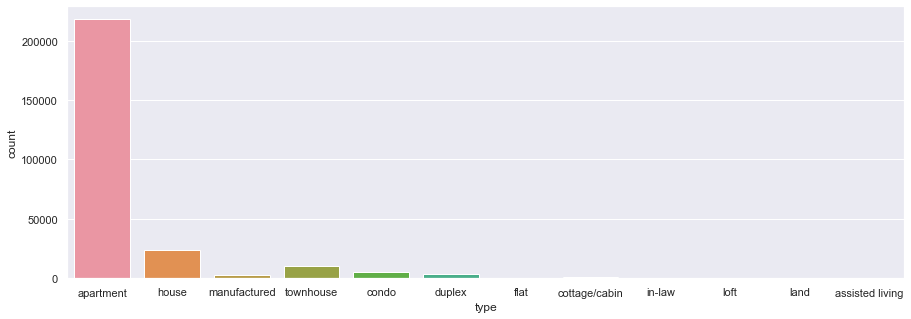

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(df['type'])
plt.show()

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


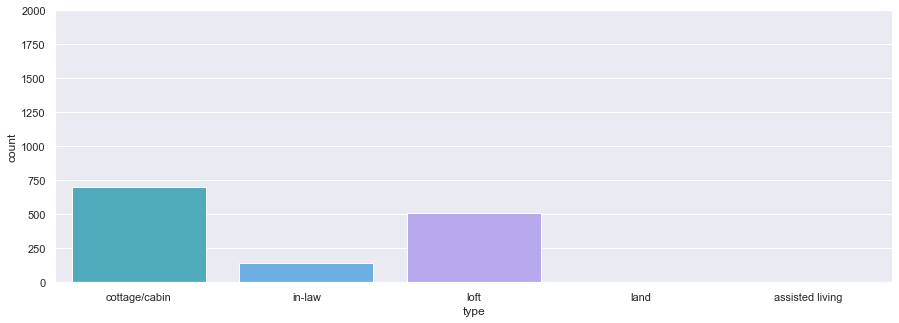

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(df['type'])
plt.xlim(6.5,11.5)
plt.ylim(0,2000)
plt.show()

##### The data for land and assisted living ae very less as compared to other data, removing them is the best option if we want to increase our accuracy

In [27]:
df = df.drop(index = df[df.type == 'land'].index).reset_index(drop = True)
df = df.drop(index = df[df.type == 'assisted living'].index).reset_index(drop = True)

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


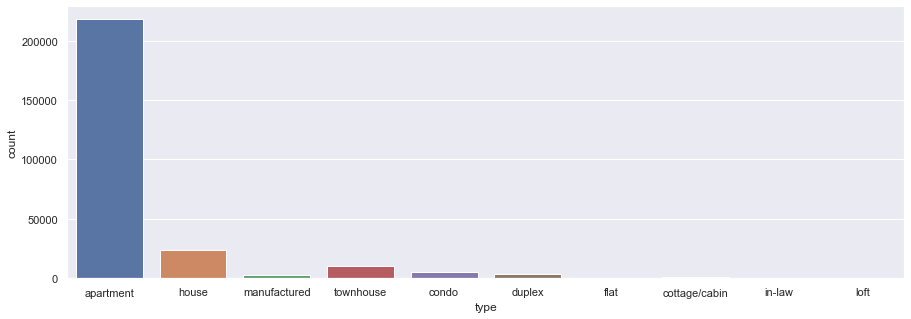

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(df['type'])
plt.show()

In [29]:
df.sqfeet.value_counts()

1000    7560
900     5790
800     5475
1200    4866
1100    4728
        ... 
2727       1
7290       1
2471       1
213        1
3221       1
Name: sqfeet, Length: 3037, dtype: int64

In [30]:
#checking houses with squarefeet greater than 4000
df[df.sqfeet > 4000]

region  price       type  sqfeet  beds  baths  \
62                birmingham   1260  apartment    5201     3    2.0   
1237    huntsville / decatur    559  apartment    4980     0    1.0   
2021    huntsville / decatur      5      house    5550     5    4.0   
2035    huntsville / decatur      5      house    5550     5    4.0   
2582    huntsville / decatur    855  apartment    7952     1    1.0   
...                      ...    ...        ...     ...   ...    ...   
263796             cleveland   7995      house    9972     6    7.0   
263799             cleveland   3999      house    7000     5    5.0   
263819             cleveland   3000      house    5416     5    5.5   
264193             cleveland   3500  townhouse    6000     2    2.0   
264636             cleveland   2800      house    5200     6    3.5   

        cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
62                 1             1                1                  0   
1237               1             1                1                  0   
2021               0             0                1                  0   
2035               0             0                1                  0   
2582               1             1                0                  0   
...              ...           ...              ...                ...   
263796             0             0                1                  0   
263799             0             0                1                  0   
263819             0             0                1                  0   
264193             1             1                1                  0   
264636             0             0                1                  0   

        electric_vehicle_charge  comes_furnished     laundry_options  \
62                            0                0  no laundry on site   
1237                          0                0     laundry on site   
2021                          0                0         w/d in unit   
2035                          0                0         w/d in unit   
2582                          0                0         w/d hookups   
...                         ...              ...                 ...   
263796                        0                0  no laundry on site   
263799                        0                0  no laundry on site   
263819                        0                0  no laundry on site   
264193                        0                1         w/d in unit   
264636                        0                0     laundry in bldg   

           parking_options      lat     long state  
62          street parking  33.4188 -86.7867    al  
1237    off-street parking  34.7389 -86.6249    al  
2021       attached garage  34.0408 -84.3859    al  
2035       attached garage  34.0408 -84.3859    al  
2582    off-street parking  34.6924 -86.7225    al  
...                    ...      ...      ...   ...  
263796      street parking  41.4826 -81.5635    oh  
263799      street parking  41.3895 -82.2382    oh  
263819     attached garage  41.4956 -81.5023    oh  
264193  off-street parking  41.5110 -81.6597    oh  
264636     detached garage  41.0302 -80.7233    oh  

[318 rows x 17 columns]

##### Nationally, 91 percent of new homes built in 2018 were less than 4,000 square feet, with a median size of 2,386 square feet, according to the Census Bureau’s Survey of Construction. Restricting sqfeet in out data to 4000 square feet.

In [31]:
df = df.drop(index = df[df.sqfeet > 4000].index).reset_index(drop = True)

In [32]:
df.beds.value_counts()

2       120108
1        80487
3        46918
4         8121
0         7510
5         1512
6          164
7           26
8           19
1100         2
Name: beds, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


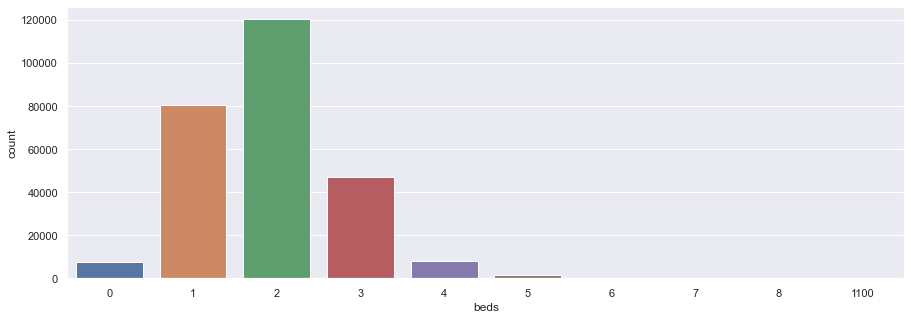

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(df['beds'])
plt.show()

##### Number of bedrooms definitely cannot be 0, 1100 or 1000, but we assume that it also cannot be greater than 6. So we are removing all the houses with more than 6 bedrooms. 
*we don't see 1000 because it was removed in the above steps.

In [34]:
df = df.drop(index = df[df.beds > 6].index).reset_index(drop = True)
df = df.drop(index = df[df.beds < 1].index).reset_index(drop = True)

In [35]:
df.beds.value_counts()

2    120108
1     80487
3     46918
4      8121
5      1512
6       164
Name: beds, dtype: int64

In [36]:
df.baths.value_counts()

1.0    128890
2.0     93625
1.5     18451
2.5      8159
3.0      4217
0.0      2042
4.0      1091
3.5       611
4.5       114
5.0        79
5.5        23
6.0         8
Name: baths, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


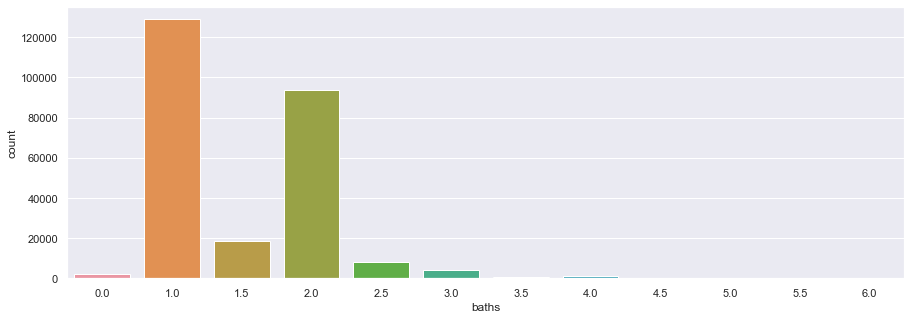

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(df['baths'])
plt.show()

##### Number of bathrooms definitely cannot be 0 and more that 4.5 bathrooms would be absurd. We assume that the values in float specifies guest or half bathroom, so we do not convert the type and remove rows with more than 4.5 bathrooms.

In [38]:
df = df.drop(index = df[df.baths > 4.5].index).reset_index(drop = True)
df = df.drop(index = df[df.baths < 1].index).reset_index(drop = True)

In [39]:
df.cats_allowed.value_counts()

1    182795
0     72363
Name: cats_allowed, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


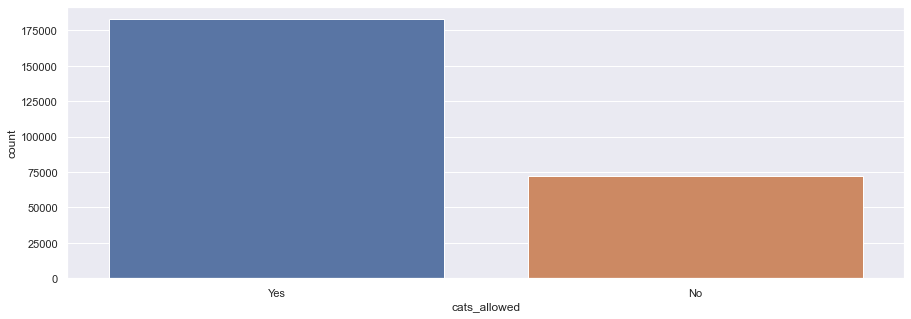

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(df['cats_allowed'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [41]:
df.dogs_allowed.value_counts()

1    177836
0     77322
Name: dogs_allowed, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


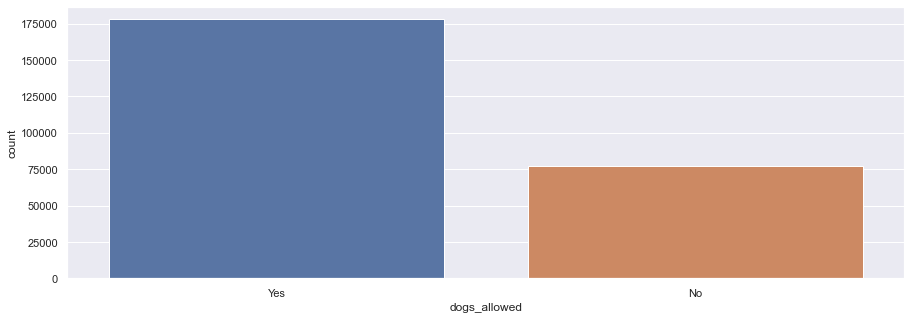

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['dogs_allowed'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [43]:
df.smoking_allowed.value_counts()

1    187500
0     67658
Name: smoking_allowed, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


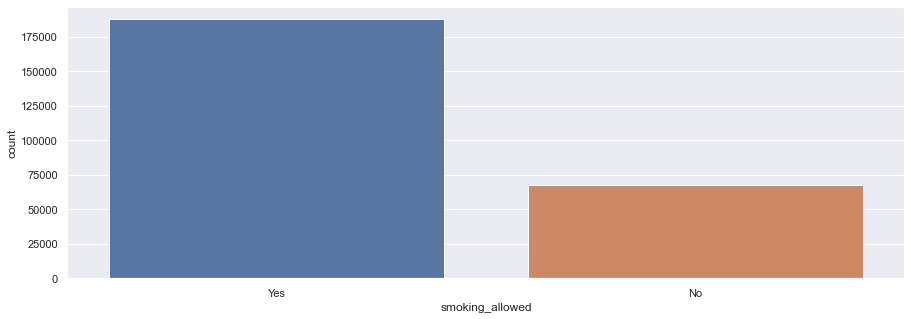

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df['smoking_allowed'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [45]:
df.wheelchair_access.value_counts()

0    235284
1     19874
Name: wheelchair_access, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


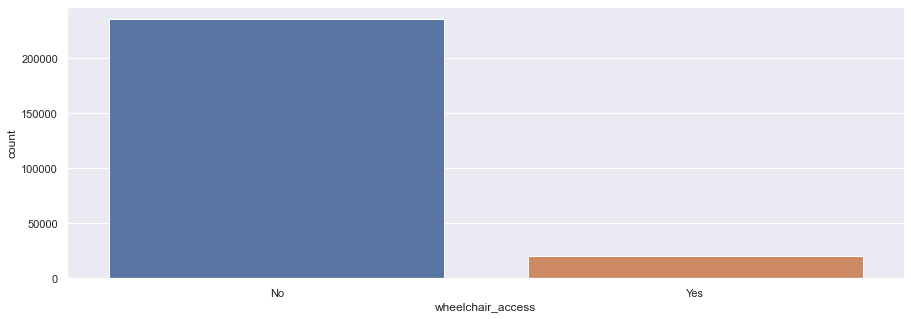

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(df['wheelchair_access'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [47]:
df.electric_vehicle_charge.value_counts()

0    251553
1      3605
Name: electric_vehicle_charge, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


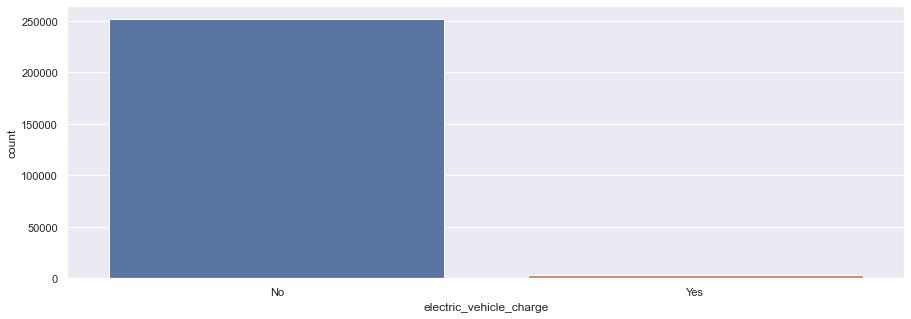

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(df['electric_vehicle_charge'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [49]:
df.comes_furnished.value_counts()

0    243345
1     11813
Name: comes_furnished, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


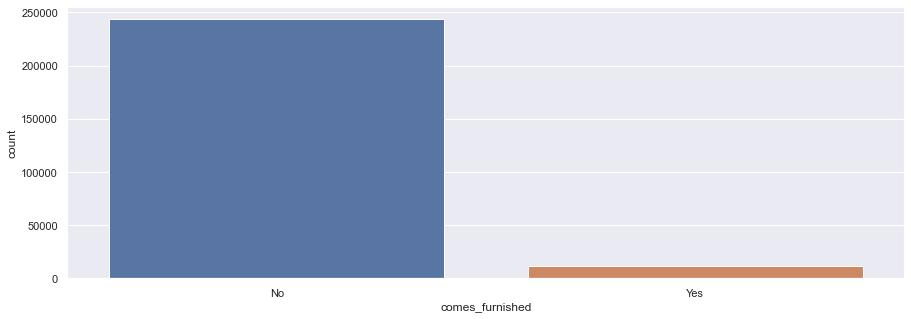

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(df['comes_furnished'].map({0 : 'No', 1 : 'Yes'}))
plt.show()

In [51]:
df.laundry_options.value_counts()

w/d in unit           88699
no laundry on site    54422
w/d hookups           49739
laundry on site       36323
laundry in bldg       25975
Name: laundry_options, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


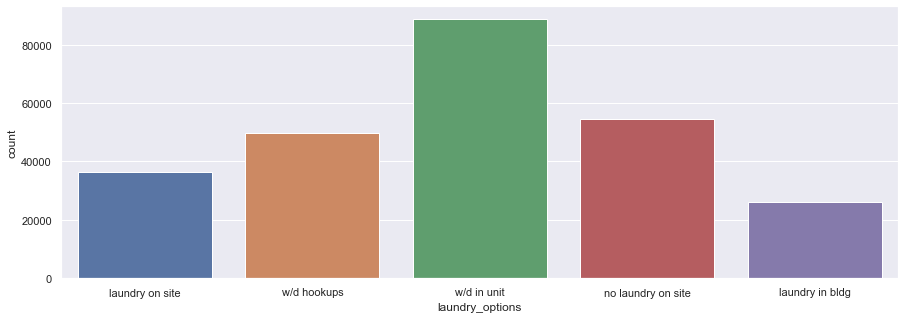

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(df['laundry_options'])
plt.show()

In [53]:
df.parking_options.value_counts()

street parking        101503
off-street parking     84716
carport                27921
attached garage        26637
detached garage        12448
no parking              1817
valet parking            116
Name: parking_options, dtype: int64

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


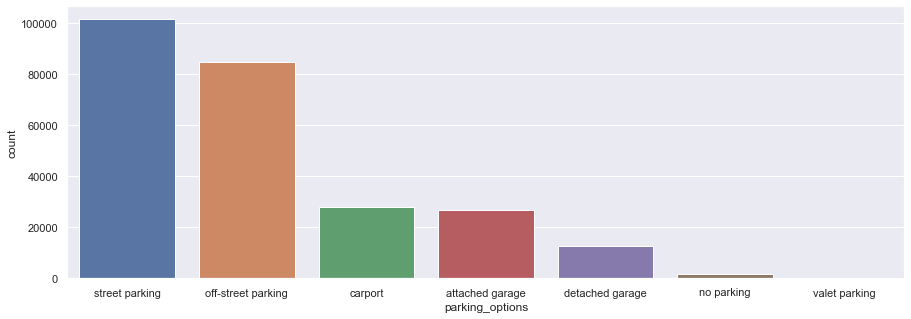

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(df['parking_options'])
plt.show()

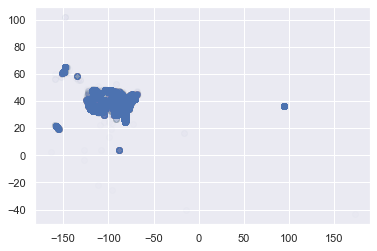

In [55]:
plt.scatter(df['long'], df['lat'],alpha=0.01)
plt.show()

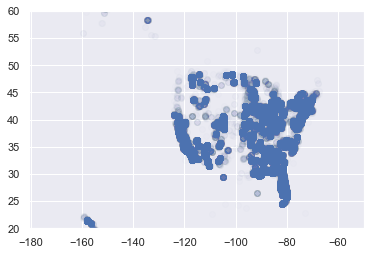

In [56]:
plt.scatter(df['long'], df['lat'],alpha=0.01)
plt.xlim(right = -50)
plt.ylim(bottom = 20,top = 60)
plt.show()

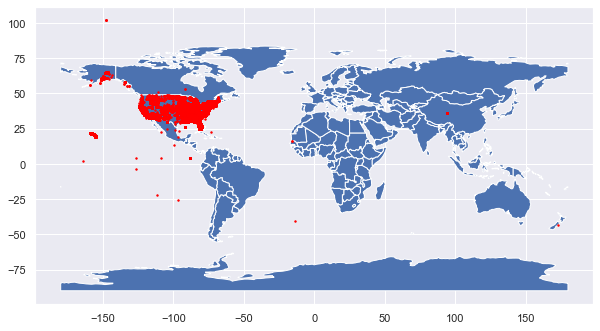

In [57]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry = geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (10, 6)), marker = 'o', color = 'red', markersize = 2);

In [58]:
df_map = df.copy()

In [59]:
df_map.drop(index = df_map[df_map.long > -58].index, inplace = True)
df_map.drop(index = df_map[df_map.long < -125].index, inplace = True)
df_map.drop(index = df_map[df_map.lat > 50].index, inplace = True)
df_map.drop(index = df_map[df_map.lat < 24].index, inplace = True)

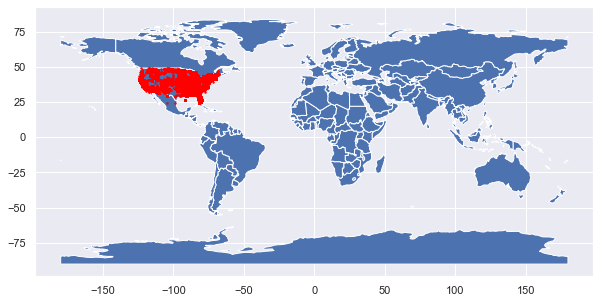

In [60]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df_map['long'], df_map['lat'])]
gdf = GeoDataFrame(df_map, geometry = geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (10, 6)), marker = 'o', color = 'red', markersize = 2);

##### We do not want to remove data points for Alaska and Hawai, so we add them back to df_maps

In [61]:
df_alaska = df.drop(index = df[df.long > -130].index)
df_alaska.append(df.drop(index = df[df.long < -170].index))
df_alaska.append(df.drop(index = df[df.lat > 72].index))
df_alaska.append(df.drop(index = df[df.long < 52].index))
df_alaska.drop(index = df_alaska[df_alaska.lat > 70].index, inplace = True)
df_alaska.drop(index = df_alaska[df_alaska.lat < 13].index, inplace = True)
df_alaska.reset_index(drop = True)

region  price           type  sqfeet  beds  baths  \
0             anchorage / mat-su    975      apartment    1100     2    1.0   
1             anchorage / mat-su   1045      apartment    1100     2    1.0   
2             anchorage / mat-su   1045      apartment    1100     2    1.0   
3             anchorage / mat-su   1265      apartment     840     3    1.0   
4             anchorage / mat-su    920      apartment     540     1    1.0   
...                          ...    ...            ...     ...   ...    ...   
3686                      hawaii   1170          house    1068     1    1.0   
3687                      hawaii   1450      apartment     705     2    1.0   
3688                      hawaii   1450          condo     615     1    1.0   
3689                      hawaii   1850  cottage/cabin     800     1    1.0   
3690  lafayette / west lafayette   1200      apartment     546     1    1.0   

      cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
0                1             1                1                  0   
1                1             0                1                  0   
2                1             0                1                  0   
3                1             1                1                  0   
4                1             1                1                  0   
...            ...           ...              ...                ...   
3686             1             1                1                  0   
3687             0             0                1                  0   
3688             0             0                0                  0   
3689             1             0                0                  0   
3690             0             0                1                  0   

      electric_vehicle_charge  comes_furnished     laundry_options  \
0                           0                0     laundry in bldg   
1                           0                0         w/d in unit   
2                           0                0         w/d in unit   
3                           0                0         w/d in unit   
4                           0                0     laundry in bldg   
...                       ...              ...                 ...   
3686                        0                0         w/d in unit   
3687                        0                0     laundry in bldg   
3688                        0                0     laundry in bldg   
3689                        0                0     laundry on site   
3690                        0                1  no laundry on site   

         parking_options      lat     long state                     geometry  
0     off-street parking  61.1790 -149.895    ak  POINT (-149.89500 61.17900)  
1     off-street parking  61.1901 -149.936    ak  POINT (-149.93600 61.19010)  
2     off-street parking  61.1812 -149.943    ak  POINT (-149.94300 61.18120)  
3     off-street parking  61.2234 -149.748    ak  POINT (-149.74800 61.22340)  
4         street parking  61.1972 -149.909    ak  POINT (-149.90900 61.19720)  
...                  ...      ...      ...   ...                          ...  
3686     attached garage  19.9350 -155.167    hi  POINT (-155.16700 19.93500)  
3687      street parking  21.3781 -158.027    hi  POINT (-158.02700 21.37810)  
3688  off-street parking  21.3123 -157.859    hi  POINT (-157.85900 21.31230)  
3689             carport  21.4242 -157.752    hi  POINT (-157.75200 21.42420)  
3690  off-street parking  21.2811 -157.827    in  POINT (-157.82700 21.28110)  

[3691 rows x 18 columns]

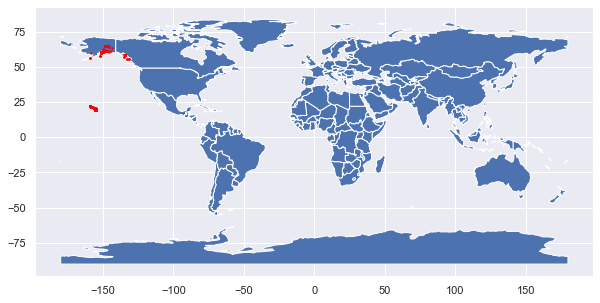

In [62]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df_alaska['long'], df_alaska['lat'])]
gdf = GeoDataFrame(df_alaska, geometry = geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (10, 6)), marker = 'o', color = 'red', markersize = 2);

In [63]:
df_map_1 = pd.concat([df_map, df_alaska])

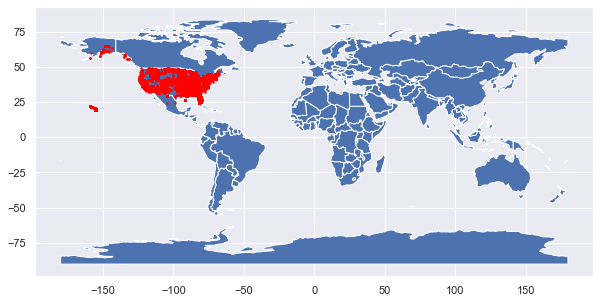

In [64]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df_map_1['long'], df_map_1['lat'])]
gdf = GeoDataFrame(df_map_1, geometry = geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (10, 6)), marker = 'o', color = 'red', markersize = 2);

In [65]:
df_map_1.price

0         1195
1         1120
2          825
3          800
4          785
          ... 
114056    1170
114057    1450
114058    1450
114059    1850
132689    1200
Name: price, Length: 254805, dtype: int64

<AxesSubplot:>

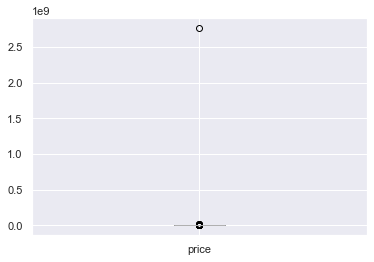

In [66]:
df_map_1.boxplot('price')

##### We cannot see the plot because there is a huge value in price. Assuming that rent of an apartment cannot be more than $5000

In [67]:
df_map_1.drop(index = df_map_1[df_map_1.price > 5000].index, inplace = True)

<AxesSubplot:>

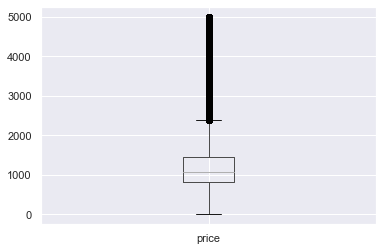

In [68]:
df_map_1.boxplot('price')

### Data Visualization

In [69]:
data_visuals = df_map_1.copy()

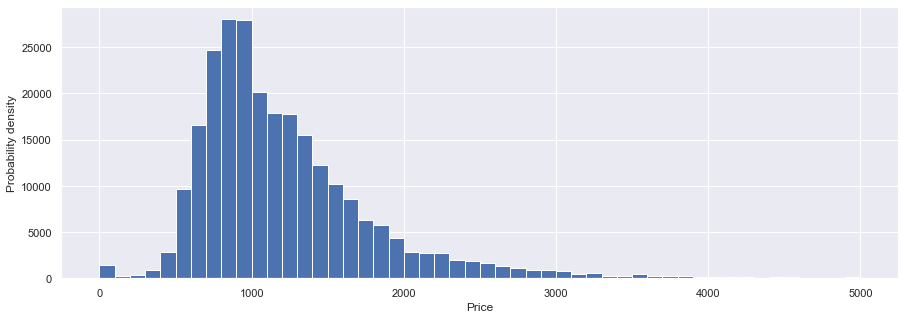

In [70]:
plt.figure(figsize=(15,5))
bins = 50
plt.hist(data_visuals.price, bins)
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.show()

##### Removing price greater than $4000

In [71]:
data_visuals.drop(index = data_visuals[data_visuals.price > 4000].index, inplace = True)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqfeet'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'cats_allowed'}>,
        <AxesSubplot:title={'center':'dogs_allowed'}>],
       [<AxesSubplot:title={'center':'smoking_allowed'}>,
        <AxesSubplot:title={'center':'wheelchair_access'}>,
        <AxesSubplot:title={'center':'electric_vehicle_charge'}>],
       [<AxesSubplot:title={'center':'comes_furnished'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>]], dtype=object)

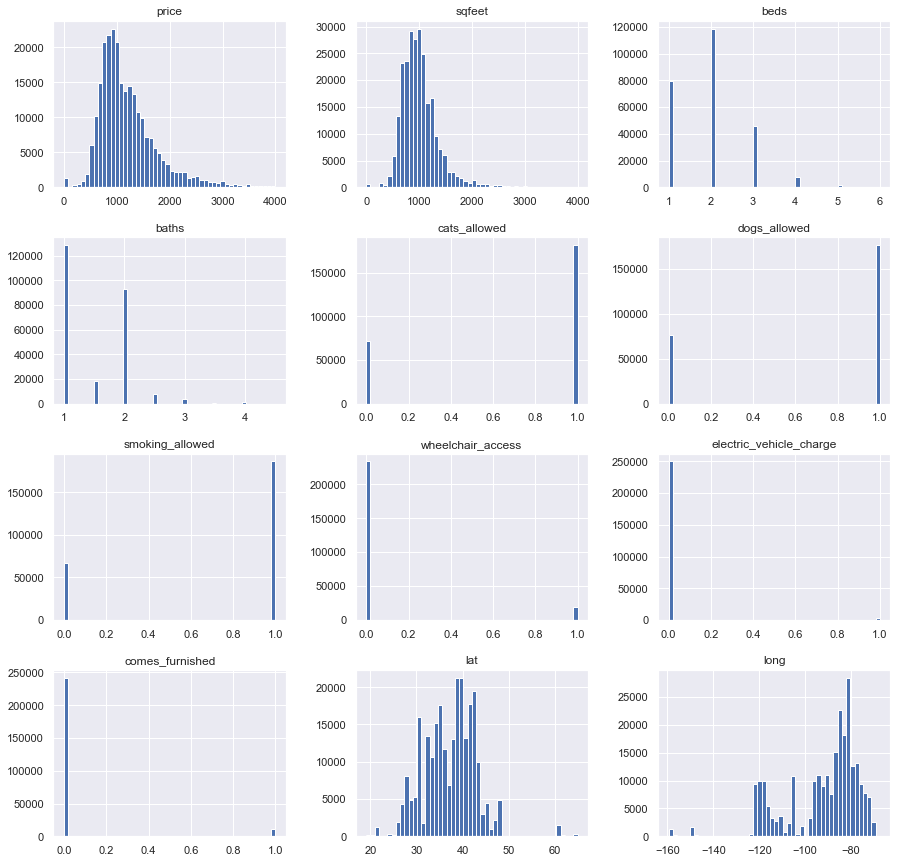

In [72]:
data_visuals.hist(bins = 50, figsize = (15,15))

##### We will plot histogram again after encoding our variables

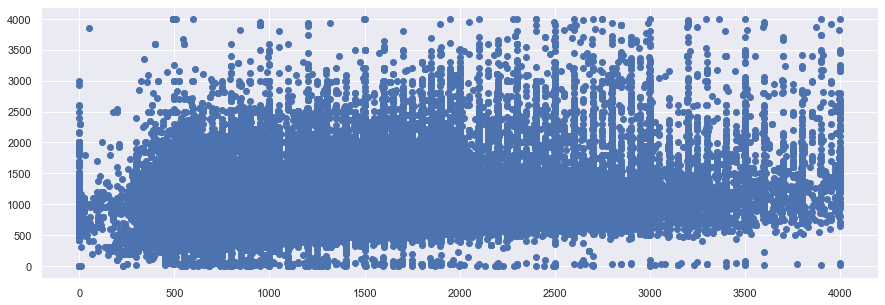

In [73]:
plt.figure(figsize=(15,5))
plt.scatter(data_visuals.price, data_visuals.sqfeet)

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house has more price')

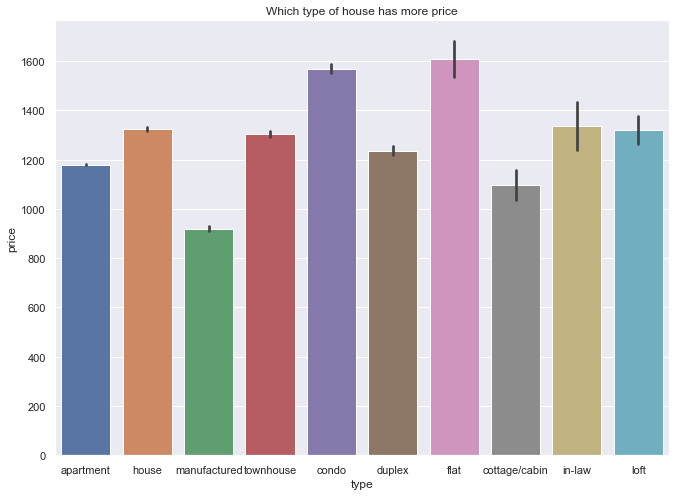

In [74]:
sns.barplot(data_visuals["type"], data_visuals["price"])
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.title('Which type of house has more price')

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house has more sqfeet')

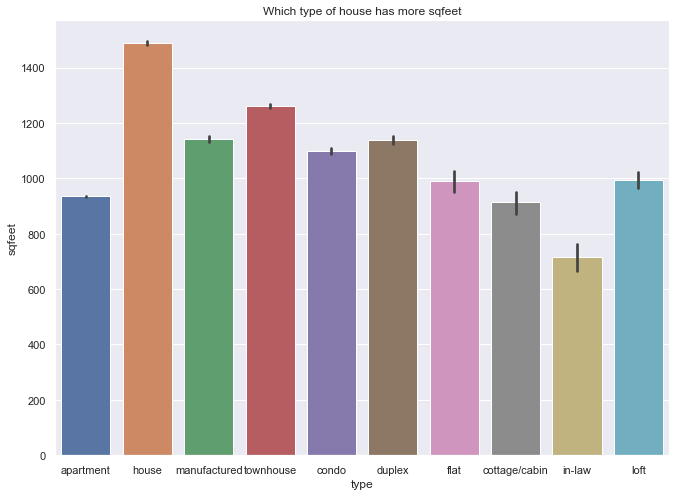

In [75]:
sns.barplot(data_visuals["type"], data_visuals["sqfeet"])
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.title('Which type of house has more sqfeet')

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house has more bathrooms')

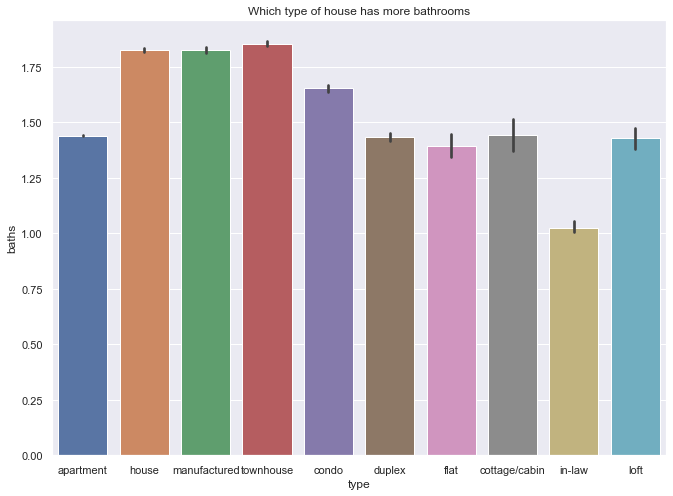

In [76]:
sns.barplot(data_visuals["type"], data_visuals["baths"])
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.title('Which type of house has more bathrooms')

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of house has more beds')

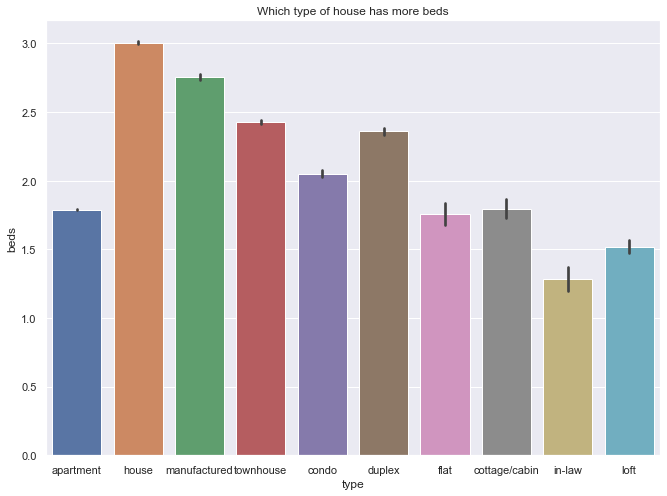

In [77]:
sns.barplot(data_visuals["type"], data_visuals["beds"])
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.title('Which type of house has more beds')

/Library/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Which type of parking option has more price')

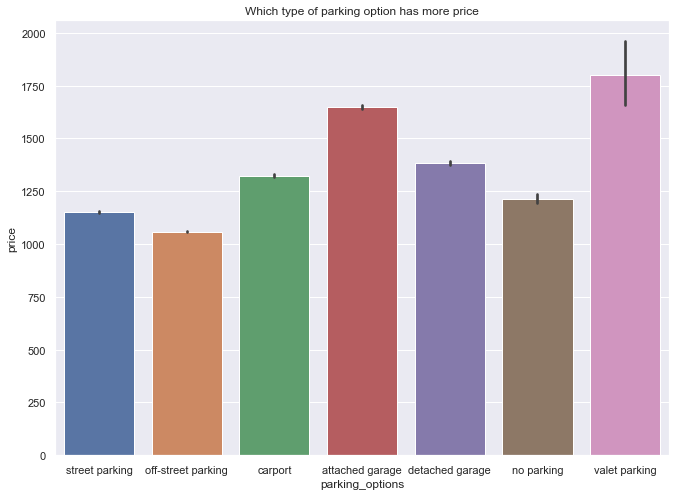

In [78]:
sns.barplot(data_visuals["parking_options"], data_visuals["price"])
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.title('Which type of parking option has more price')

In [79]:
import plotly.express as px

pie_house = raw_data.groupby(["type"])[["price"]].mean().reset_index()

fig = px.pie(pie_house, values = "price", names = "type", template = "seaborn")
fig.update_traces(rotation = 90, pull = 0.05, textinfo = "percent+label")
fig.show()

### Data Processing

In [80]:
z = data_visuals.copy()

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [82]:
z.drop(columns = ['geometry'], inplace = True)
z

region  price           type  sqfeet  beds  baths  \
0                       birmingham   1195      apartment    1908     3    2.0   
1                       birmingham   1120      apartment    1319     3    2.0   
2                       birmingham    825      apartment    1133     1    1.5   
3                       birmingham    800      apartment     927     1    1.0   
4                       birmingham    785      apartment    1047     2    1.0   
...                            ...    ...            ...     ...   ...    ...   
114056                      hawaii   1170          house    1068     1    1.0   
114057                      hawaii   1450      apartment     705     2    1.0   
114058                      hawaii   1450          condo     615     1    1.0   
114059                      hawaii   1850  cottage/cabin     800     1    1.0   
132689  lafayette / west lafayette   1200      apartment     546     1    1.0   

        cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
0                  1             1                1                  0   
1                  1             1                1                  0   
2                  1             1                1                  0   
3                  1             1                1                  0   
4                  1             1                1                  0   
...              ...           ...              ...                ...   
114056             1             1                1                  0   
114057             0             0                1                  0   
114058             0             0                0                  0   
114059             1             0                0                  0   
132689             0             0                1                  0   

        electric_vehicle_charge  comes_furnished     laundry_options  \
0                             0                0     laundry on site   
1                             0                0     laundry on site   
2                             0                0     laundry on site   
3                             0                0     laundry on site   
4                             0                0     laundry on site   
...                         ...              ...                 ...   
114056                        0                0         w/d in unit   
114057                        0                0     laundry in bldg   
114058                        0                0     laundry in bldg   
114059                        0                0     laundry on site   
132689                        0                1  no laundry on site   

           parking_options      lat      long state  
0           street parking  33.4226  -86.7065    al  
1       off-street parking  33.3755  -86.8045    al  
2           street parking  33.4226  -86.7065    al  
3           street parking  33.4226  -86.7065    al  
4           street parking  33.4226  -86.7065    al  
...                    ...      ...       ...   ...  
114056     attached garage  19.9350 -155.1670    hi  
114057      street parking  21.3781 -158.0270    hi  
114058  off-street parking  21.3123 -157.8590    hi  
114059             carport  21.4242 -157.7520    hi  
132689  off-street parking  21.2811 -157.8270    in  

[253243 rows x 17 columns]

In [83]:
z["region"]=le.fit_transform(z["region"])
z["type"]=le.fit_transform(z["type"])
z["laundry_options"]=le.fit_transform(z["laundry_options"])
z["parking_options"]=le.fit_transform(z["parking_options"])
z["state"]=le.fit_transform(z["state"])

In [84]:
z.head()

region  price  type  sqfeet  beds  baths  cats_allowed  dogs_allowed  \
0      21   1195     0    1908     3    2.0             1             1   
1      21   1120     0    1319     3    2.0             1             1   
2      21    825     0    1133     1    1.5             1             1   
3      21    800     0     927     1    1.0             1             1   
4      21    785     0    1047     2    1.0             1             1   

   smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0                1                  0                        0   
1                1                  0                        0   
2                1                  0                        0   
3                1                  0                        0   
4                1                  0                        0   

   comes_furnished  laundry_options  parking_options      lat     long  state  
0                0                1                5  33.4226 -86.7065      1  
1                0                1                4  33.3755 -86.8045      1  
2                0                1                5  33.4226 -86.7065      1  
3                0                1                5  33.4226 -86.7065      1  
4                0                1                5  33.4226 -86.7065      1

##### All our data are converted to numerical format

array([[<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'sqfeet'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'cats_allowed'}>,
        <AxesSubplot:title={'center':'dogs_allowed'}>],
       [<AxesSubplot:title={'center':'smoking_allowed'}>,
        <AxesSubplot:title={'center':'wheelchair_access'}>,
        <AxesSubplot:title={'center':'electric_vehicle_charge'}>,
        <AxesSubplot:title={'center':'comes_furnished'}>],
       [<AxesSubplot:title={'center':'laundry_options'}>,
        <AxesSubplot:title={'center':'parking_options'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'state'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

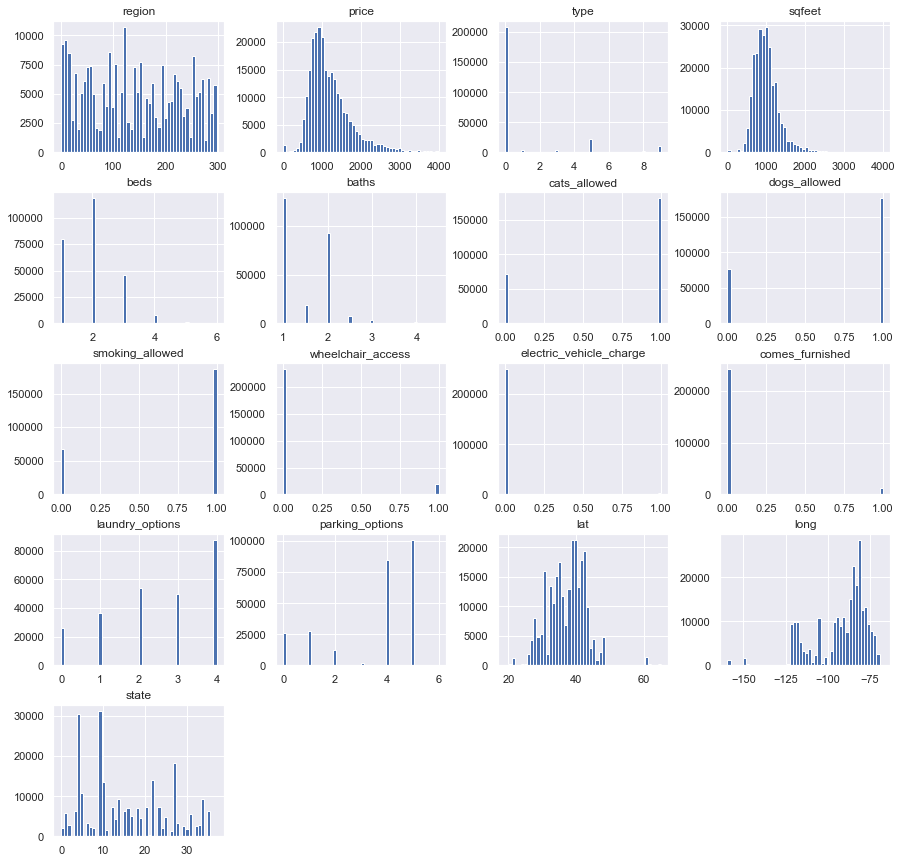

In [85]:
z.hist(bins = 50, figsize = (15,15))

In [86]:
x = z.drop(columns = ['price'])

In [87]:
y = z.price

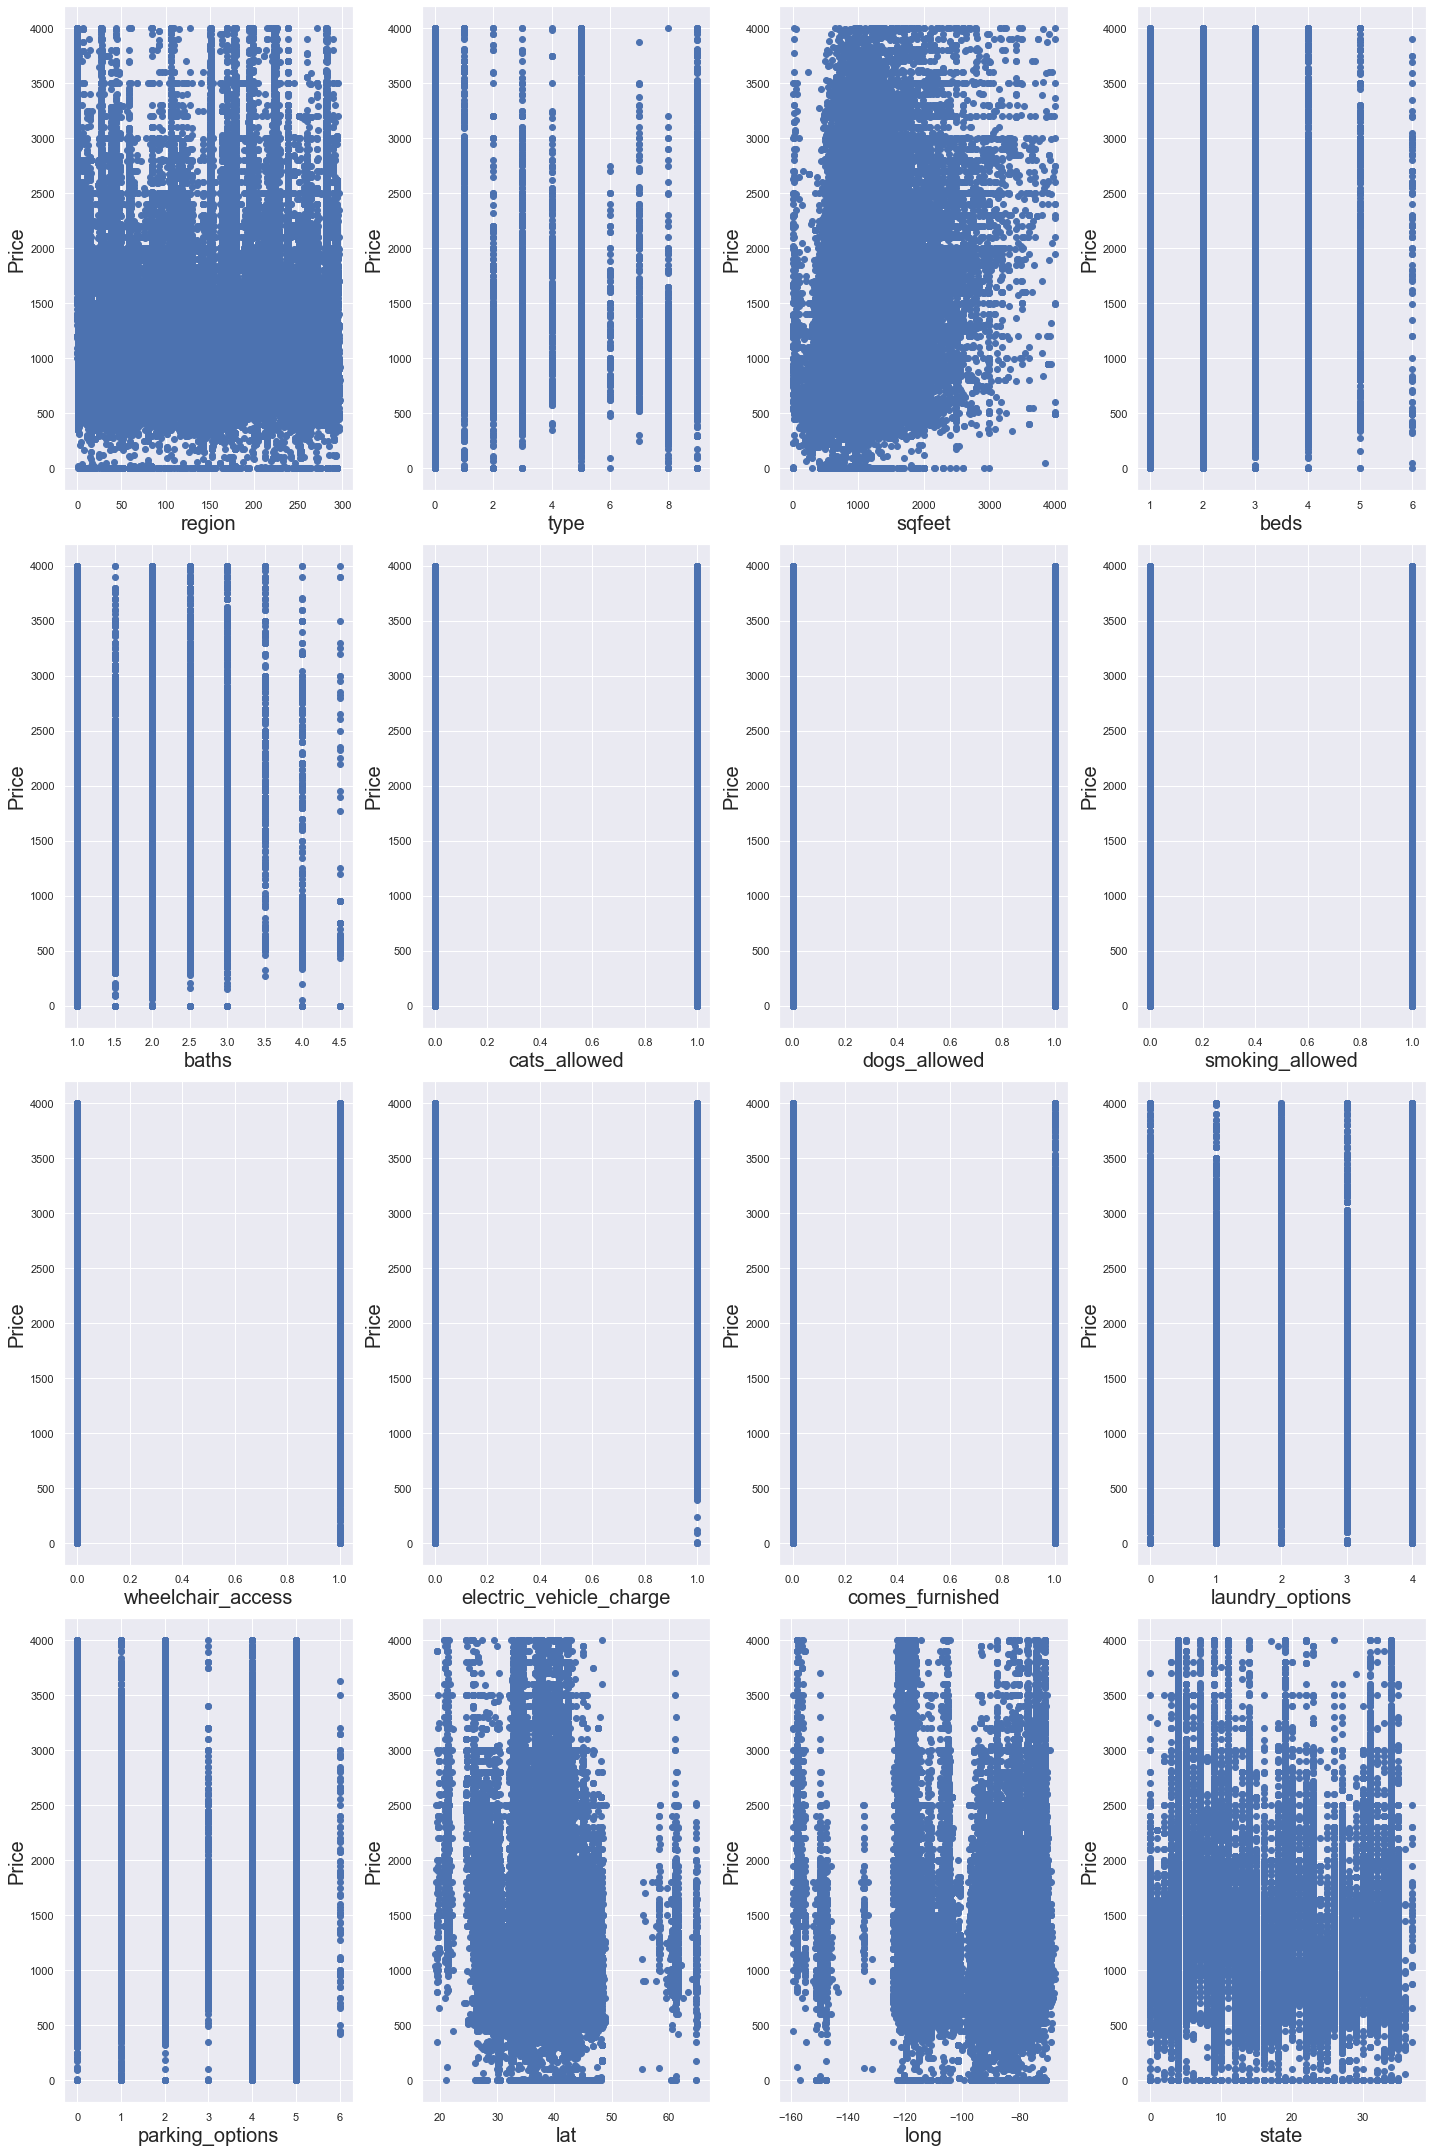

In [88]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

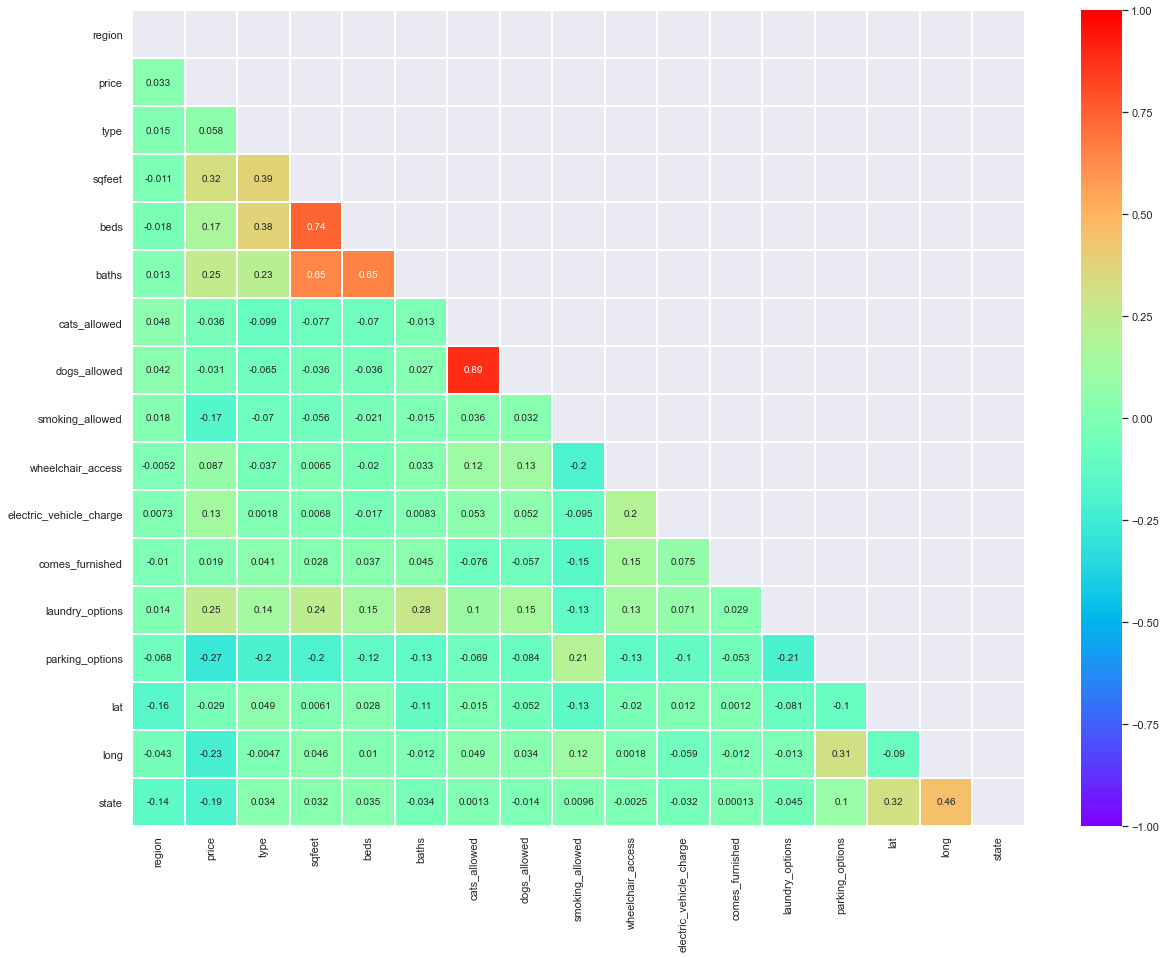

In [89]:
corr_matrix = z.corr()
mask = np.triu(corr_matrix)
plt.subplots(figsize=(20,15))
sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, linewidths = 1, linecolor = 'white',
            cmap = 'rainbow', mask = mask, annot = True)

##### We can see that dogs_allowed and cats_allowed have a very high correlation, so we drop one and rename the column to pets_allowed.

In [90]:
z.drop(columns = ['cats_allowed'], inplace = True)
z.rename(columns = {'dogs_allowed' : 'pets_allowed'}, inplace = True)
z

region  price  type  sqfeet  beds  baths  pets_allowed  \
0           21   1195     0    1908     3    2.0             1   
1           21   1120     0    1319     3    2.0             1   
2           21    825     0    1133     1    1.5             1   
3           21    800     0     927     1    1.0             1   
4           21    785     0    1047     2    1.0             1   
...        ...    ...   ...     ...   ...    ...           ...   
114056     106   1170     5    1068     1    1.0             1   
114057     106   1450     0     705     2    1.0             0   
114058     106   1450     1     615     1    1.0             0   
114059     106   1850     2     800     1    1.0             0   
132689     136   1200     0     546     1    1.0             0   

        smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0                     1                  0                        0   
1                     1                  0                        0   
2                     1                  0                        0   
3                     1                  0                        0   
4                     1                  0                        0   
...                 ...                ...                      ...   
114056                1                  0                        0   
114057                1                  0                        0   
114058                0                  0                        0   
114059                0                  0                        0   
132689                1                  0                        0   

        comes_furnished  laundry_options  parking_options      lat      long  \
0                     0                1                5  33.4226  -86.7065   
1                     0                1                4  33.3755  -86.8045   
2                     0                1                5  33.4226  -86.7065   
3                     0                1                5  33.4226  -86.7065   
4                     0                1                5  33.4226  -86.7065   
...                 ...              ...              ...      ...       ...   
114056                0                4                0  19.9350 -155.1670   
114057                0                0                5  21.3781 -158.0270   
114058                0                0                4  21.3123 -157.8590   
114059                0                1                1  21.4242 -157.7520   
132689                1                2                4  21.2811 -157.8270   

        state  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
114056     11  
114057     11  
114058     11  
114059     11  
132689     15  

[253243 rows x 16 columns]

<AxesSubplot:>

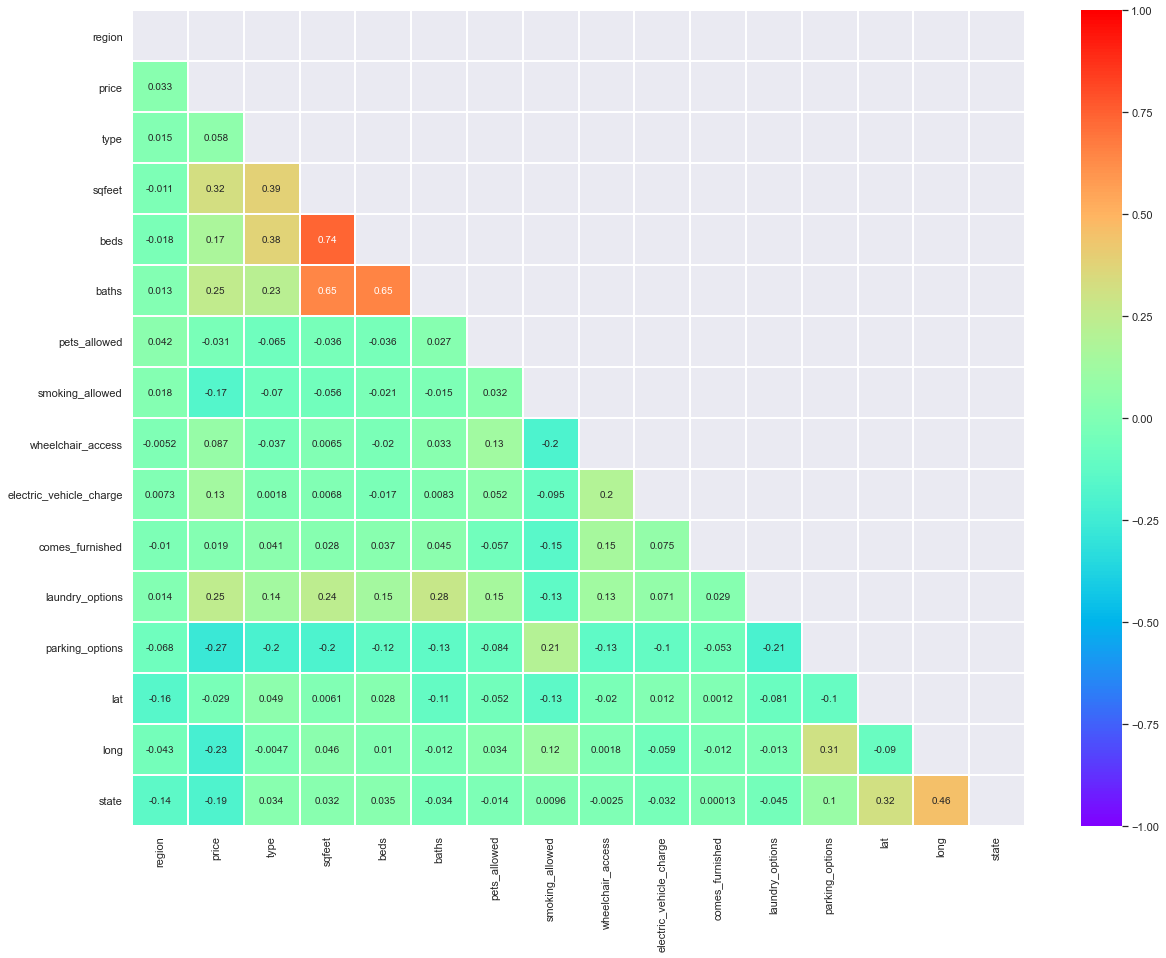

In [91]:
corr_matrix = z.corr()
mask = np.triu(corr_matrix)
plt.subplots(figsize=(20,15))
sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, linewidths = 1, linecolor = 'white',
            cmap = 'rainbow', mask = mask, annot = True)

### Final Data Description and Size

In [92]:
z.describe().T

count         mean         std       min  \
region                   253243.0   139.594125   88.473226    0.0000   
price                    253243.0  1202.258724  559.722611    0.0000   
type                     253243.0     0.988695    2.356484    0.0000   
sqfeet                   253243.0  1006.407253  360.538120    0.0000   
beds                     253243.0     1.947959    0.820484    1.0000   
baths                    253243.0     1.499629    0.568014    1.0000   
pets_allowed             253243.0     0.697543    0.459323    0.0000   
smoking_allowed          253243.0     0.735732    0.440943    0.0000   
wheelchair_access        253243.0     0.077447    0.267300    0.0000   
electric_vehicle_charge  253243.0     0.013706    0.116269    0.0000   
comes_furnished          253243.0     0.045241    0.207833    0.0000   
laundry_options          253243.0     2.539423    1.356137    0.0000   
parking_options          253243.0     3.554041    1.741932    0.0000   
lat                      253243.0    37.202799    5.661114   19.1002   
long                     253243.0   -92.328245   16.235531 -159.5300   
state                    253243.0    15.450362    9.991419    0.0000   

                              25%        50%        75%        max  
region                    59.0000   139.0000   217.0000   297.0000  
price                    822.5000  1063.0000  1445.0000  4000.0000  
type                       0.0000     0.0000     0.0000     9.0000  
sqfeet                   770.0000   958.0000  1160.0000  4000.0000  
beds                       1.0000     2.0000     2.0000     6.0000  
baths                      1.0000     1.0000     2.0000     4.5000  
pets_allowed               0.0000     1.0000     1.0000     1.0000  
smoking_allowed            0.0000     1.0000     1.0000     1.0000  
wheelchair_access          0.0000     0.0000     0.0000     1.0000  
electric_vehicle_charge    0.0000     0.0000     0.0000     1.0000  
comes_furnished            0.0000     0.0000     0.0000     1.0000  
laundry_options            2.0000     3.0000     4.0000     4.0000  
parking_options            2.0000     4.0000     5.0000     6.0000  
lat                       33.4805    37.9849    41.1941    64.9937  
long                    -101.2970   -86.2823   -81.2662   -67.4820  
state                      7.0000    14.0000    23.0000    37.0000

In [93]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253243 entries, 0 to 132689
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   253243 non-null  int64  
 1   price                    253243 non-null  int64  
 2   type                     253243 non-null  int64  
 3   sqfeet                   253243 non-null  int64  
 4   beds                     253243 non-null  int64  
 5   baths                    253243 non-null  float64
 6   pets_allowed             253243 non-null  int64  
 7   smoking_allowed          253243 non-null  int64  
 8   wheelchair_access        253243 non-null  int64  
 9   electric_vehicle_charge  253243 non-null  int64  
 10  comes_furnished          253243 non-null  int64  
 11  laundry_options          253243 non-null  int64  
 12  parking_options          253243 non-null  int64  
 13  lat                      253243 non-null  float64
 14  long

### Moddeling and Data Prediction

In [94]:
X = z.drop(columns = ['price'])
y = z.price

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30,random_state = 1)

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [97]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr = LinearRegression()
knn = KNeighborsClassifier()

In [98]:
models = {"Decision tree Regressor" : dt,
          "Random forest" : rf,
          "Linear Regression" : lr,
         "K Neighbors Classifier": knn}
scores= { }

In [99]:
for key, value in models.items():   
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [100]:
scores = pd.DataFrame(scores, index = ["Accuracy Score"]).T
scores.sort_values(by = ["Accuracy Score"], axis = 0 ,ascending = False, inplace = True)
scores

Accuracy Score
Random forest                  0.891381
Decision tree Regressor        0.807799
K Neighbors Classifier         0.449502
Linear Regression              0.255130

In [101]:
scores.index

Index(['Random forest', 'Decision tree Regressor', 'K Neighbors Classifier',
       'Linear Regression'],
      dtype='object')

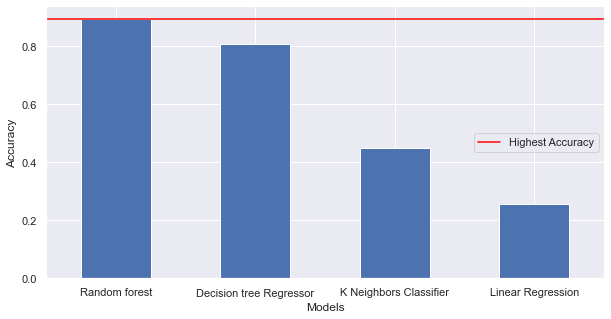

In [102]:
m = scores.index
a = scores["Accuracy Score"]

plt.figure(figsize = (10, 5))
plt.bar(m, a, 0.5)
plt.plot(range(-1,5), np.ones(6)*max(a), color = 'red', label = 'Highest Accuracy')
plt.xlim(-0.5,3.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

## Conclusion

#### I have done all the necessary Dataprocessing and Calculations, of all the Algorithms used Random Forest has the highest accuracy score for Prediction of Rents.